In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_data.csv")

In [3]:
df

,MatchID,WhiteElo,BlackElo,ECO,eval,Result
0,1,2569,2462,D12,0.29,1
1,2,2581,2574,B00,-0.22,0
2,3,2573,2479,B53,-3.13,0
3,4,2602,2343,A40,1.00,1
4,5,2578,2575,C03,0.91,1
...,...,...,...,...,...,...
9995,9996,2487,2510,B28,1.34,0
9996,9997,2566,2697,A40,1.36,0
9997,9998,2498,2566,A04,0.32,0
9998,9999,2815,2486,C10,0.50,1


In [4]:
# column = df['ECO'].astype('int')
# column_encoded = column.cat.codes

In [5]:
# column

In [211]:
tmp=[]
for i in df['ECO']:
    if i not in tmp:
        tmp.append(i)
mp={}
for i in range(1,len(tmp)+1):
    mp[tmp[i-1]]=i

In [212]:
for i in range(0,10000):
    df.iloc[i, 3] = mp[df.iloc[i, 3]]

In [213]:
df

,MatchID,WhiteElo,BlackElo,ECO,eval,Result
0,1,2569,2462,1,0.29,1
1,2,2581,2574,2,-0.22,0
2,3,2573,2479,3,-3.13,0
3,4,2602,2343,4,1.00,1
4,5,2578,2575,5,0.91,1
...,...,...,...,...,...,...
9995,9996,2487,2510,195,1.34,0
9996,9997,2566,2697,4,1.36,0
9997,9998,2498,2566,8,0.32,0
9998,9999,2815,2486,172,0.50,1


In [214]:
df.iloc[0, 3]

1

In [6]:
df = df.drop('MatchID', axis=1)
df

,WhiteElo,BlackElo,ECO,eval,Result
0,2569,2462,D12,0.29,1
1,2581,2574,B00,-0.22,0
2,2573,2479,B53,-3.13,0
3,2602,2343,A40,1.00,1
4,2578,2575,C03,0.91,1
...,...,...,...,...,...
9995,2487,2510,B28,1.34,0
9996,2566,2697,A40,1.36,0
9997,2498,2566,A04,0.32,0
9998,2815,2486,C10,0.50,1


In [216]:
df = df.iloc[:, 1:6]

In [217]:
df

,BlackElo,ECO,eval,Result
0,2462,1,0.29,1
1,2574,2,-0.22,0
2,2479,3,-3.13,0
3,2343,4,1.00,1
4,2575,5,0.91,1
...,...,...,...,...
9995,2510,195,1.34,0
9996,2697,4,1.36,0
9997,2566,8,0.32,0
9998,2486,172,0.50,1


<AxesSubplot:>

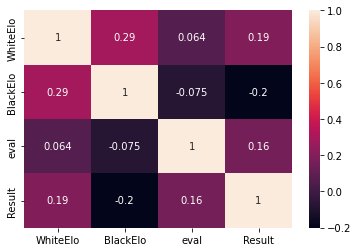

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
dum = pd.get_dummies(df['ECO'], drop_first=True)
df = pd.concat([df.drop('ECO', axis=1), dum], axis=1)
df

,WhiteElo,BlackElo,eval,Result,A01,A02,A03,A04,A05,A06,...,E87,E90,E91,E92,E93,E94,E95,E97,E98,E99
0,2569,2462,0.29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2581,2574,-0.22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2573,2479,-3.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2602,2343,1.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2578,2575,0.91,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2487,2510,1.34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,2566,2697,1.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,2498,2566,0.32,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,2815,2486,0.50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df['diff'] = df['WhiteElo'] - df['BlackElo']
df

,WhiteElo,BlackElo,eval,Result,A01,A02,A03,A04,A05,A06,...,E90,E91,E92,E93,E94,E95,E97,E98,E99,diff
0,2569,2462,0.29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,107
1,2581,2574,-0.22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,2573,2479,-3.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94
3,2602,2343,1.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,259
4,2578,2575,0.91,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2487,2510,1.34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-23
9996,2566,2697,1.36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-131
9997,2498,2566,0.32,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-68
9998,2815,2486,0.50,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,329


In [221]:
df = df.drop('WhiteElo', axis=1)
df

KeyError: "['WhiteElo'] not found in axis"

In [222]:
df = df.drop('BlackElo', axis=1)

In [24]:
X = df.drop('Result', axis=1)
y = df['Result']

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
X = scaler.fit_transform(X)

In [26]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = rf.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.623


In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[554 386]
 [368 692]]


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [34]:
predictions = logmodel.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.57      0.60       940
           1       0.65      0.69      0.67      1060

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.63      0.63      0.63      2000



In [36]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6345


In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[540 400]
 [331 729]]


In [46]:
proba = logmodel.predict_proba(X_test)

In [47]:
proba

array([[0.53709386, 0.46290614],
       [0.58807272, 0.41192728],
       [0.52729663, 0.47270337],
       ...,
       [0.32277079, 0.67722921],
       [0.46498101, 0.53501899],
       [0.71210746, 0.28789254]])

In [202]:
dff = pd.read_csv('test_data.csv')

In [203]:
dff

,MatchID,WhiteElo,BlackElo,ECO,eval
0,10001,2533,2390,B24,0.01
1,10002,2638,2490,A05,1.14
2,10003,2565,2737,E24,1.66
3,10004,2506,2539,A04,-0.08
4,10005,2470,2513,B02,0.64
...,...,...,...,...,...
1495,11496,2530,2522,B28,1.22
1496,11497,2501,2370,A36,-1.20
1497,11498,2515,2553,B40,0.70
1498,11499,2590,2459,E10,0.35


In [249]:
## mlp

In [250]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

In [252]:
le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [255]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  


In [256]:
# Finally for the MLP- Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel())  

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [257]:
predictions = mlp.predict(X_test)

In [258]:
print(predictions)

[0 0 0 ... 0 1 0]


In [259]:
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[521 441]
 [424 614]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       962
           1       0.58      0.59      0.59      1038

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000



In [48]:
proba = pd.DataFrame(proba)

In [44]:
proba.to_csv("Q5_test.csv")

In [49]:
proba

,0,1
0,0.537094,0.462906
1,0.588073,0.411927
2,0.527297,0.472703
3,0.809894,0.190106
4,0.599955,0.400045
...,...,...
1995,0.491325,0.508675
1996,0.241443,0.758557
1997,0.322771,0.677229
1998,0.464981,0.535019
